In [ ]:
import pandas as pd
import seaborn as sns

# Plot settings
# Seaborn theme
sns.set_theme(style="whitegrid", context="talk")
palette = sns.color_palette("rocket", 12)
suptitle_fontsize = 14
title_fontsize = 14
axis_fontsize = 14
label_fontsize = 14
legend_fontsize = 14

In [39]:
df = pd.read_csv("dataset.csv", index_col=0)

In [40]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [41]:
df_2 = df[["track_id", "artists", "album_name", "track_name"]]
df = df.drop(columns=["track_id", "artists", "album_name", "track_name"])

In [42]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [43]:
df["track_genre"].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [44]:
df["time_signature"].unique()

array([4, 3, 1, 5, 0])

### OneHot Encoding for Categorical Columns

In [45]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

encoded_genre = encoder.fit_transform(df[["track_genre", "time_signature"]])

# Create DataFrame
encoded_df = pd.DataFrame(
    encoded_genre,
    columns=encoder.get_feature_names_out(["track_genre", "time_signature"]),
)

# Combine with original dataframe
df_clustering = pd.concat(
    [
        df.drop(columns=["track_genre", "time_signature"]).reset_index(drop=True),
        encoded_df.reset_index(drop=True),
    ],
    axis=1,
)


In [46]:
df_clustering.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
df_clustering.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,...,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,...,0.008772,0.008772,0.008772,0.008772,0.008772,0.001430,0.008535,0.080658,0.893360,0.016018
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,...,0.093247,0.093247,0.093247,0.093247,0.093247,0.037786,0.091991,0.272310,0.308657,0.125543
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Min-Max Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

categorical_cols = [
    c for c in df_clustering.columns if c.startswith(("track_genre", "time_signature"))
]
# Identify numerical columns (everything else)
numerical_cols = [c for c in df_clustering.columns if c not in categorical_cols]

scaler = MinMaxScaler()
scaled_num_data = scaler.fit_transform(df_clustering[numerical_cols])
df_num_scaled = pd.DataFrame(
    scaled_num_data, columns=numerical_cols, index=df_clustering.index
)
df_final = pd.concat([df_num_scaled, df_clustering[categorical_cols]], axis=1)

### K-Means

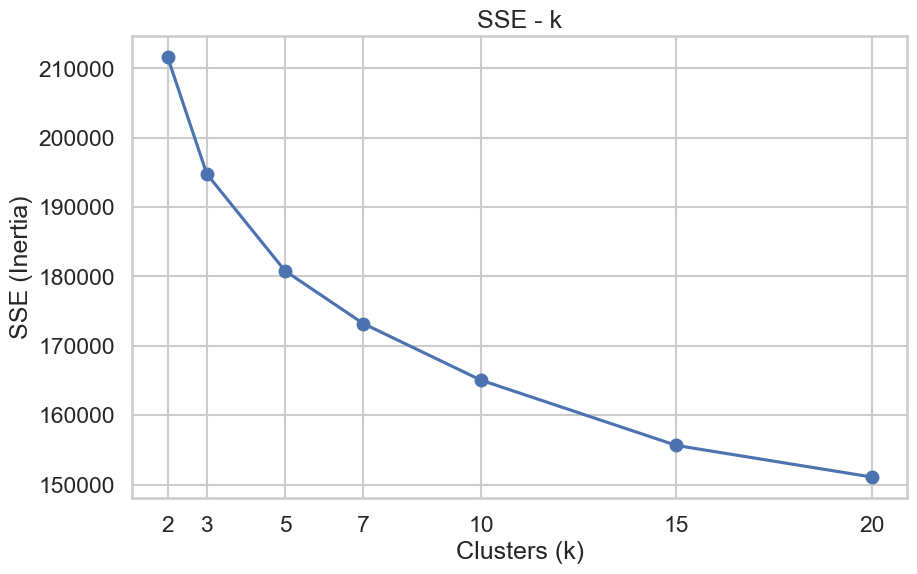

In [50]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_values = [2, 3, 5, 7, 10, 15, 20]
sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_final)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker="o", linestyle="-", color="b")
plt.xlabel("Clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("SSE - k")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [51]:
# Choose k
final_k = 10
kmeans_final = KMeans(n_clusters=final_k, random_state=42, n_init=10)
kmeans_final.fit(df_final)

,n_clusters,10
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


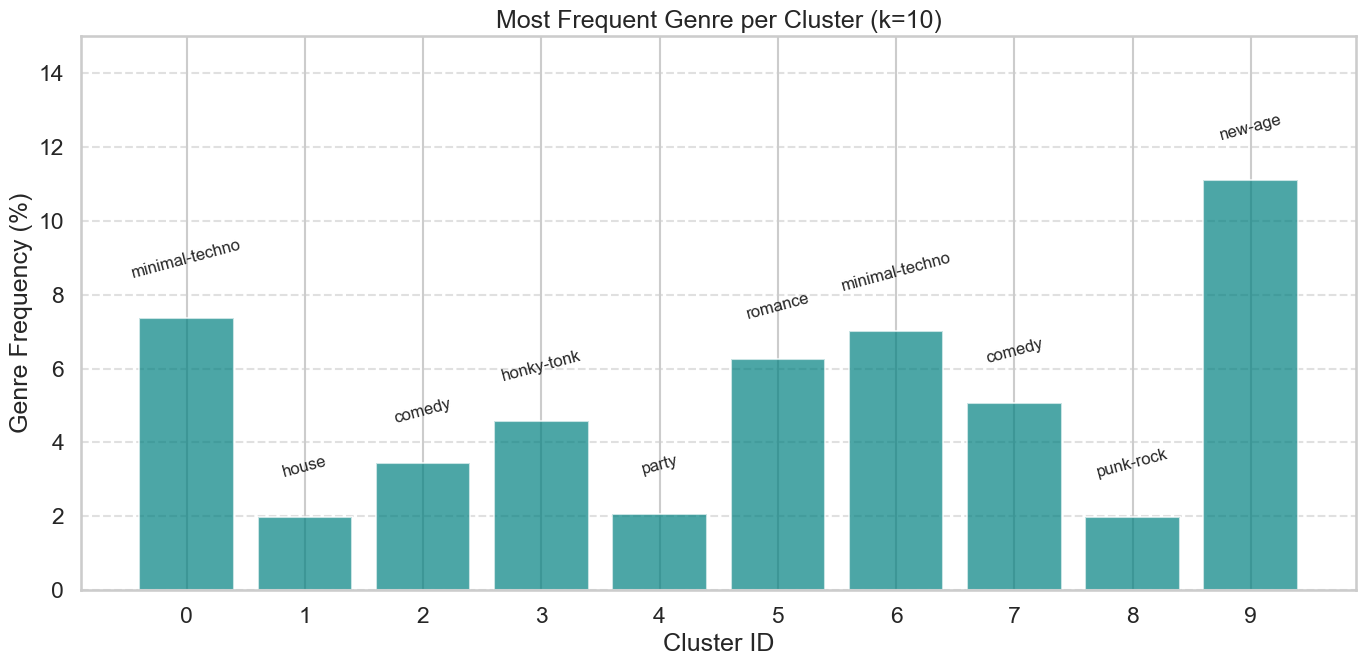

In [ ]:
# Cluster genre frequency
df["cluster_label"] = kmeans_final.labels_

cluster_summaries = []

for i in range(final_k):
    cluster_data = df[df["cluster_label"] == i]

    genre_counts = cluster_data["track_genre"].value_counts()

    if not genre_counts.empty:
        dominant_genre = genre_counts.idxmax()
        count = genre_counts.max()
        percentage = (count / len(cluster_data)) * 100

        cluster_summaries.append(
            {"Cluster": i, "Dominant_Genre": dominant_genre, "Percentage": percentage}
        )


results_df = pd.DataFrame(cluster_summaries)

plt.figure(figsize=(14, 7))
bars = plt.bar(results_df["Cluster"], results_df["Percentage"], color="teal", alpha=0.7)

# Add labels over bars
for bar, genre in zip(bars, results_df["Dominant_Genre"]):
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 1,
        genre,
        ha="center",
        va="bottom",
        fontsize=12,
        rotation=15,
    )

plt.xlabel("Cluster ID")
plt.ylabel("Genre Frequency (%)")
plt.title("Most Frequent Genre per Cluster (k=10)")
plt.xticks(range(10))
plt.ylim(0, 15)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Show popular songs and select one

In [ ]:
df_2.loc[df.sort_values("popularity", ascending=False).index]

,track_id,artists,album_name,track_name
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras)
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras)
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52"
89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata
30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue)
...,...,...,...,...
25065,1uQo8gIQWJGrY6wZLReyUP,Eric Prydz;Empire of the Sun,Fiesta portatil,We Are Mirage
25047,41aKdU4Eqr2aYFbSPT6GeS,Donna Summer,70s Christmas Party,Hot Stuff - Single Version
25046,0Ant6wBzTsOcH63OgzmaXU,Lionel Richie,Artsy & Colourful,Angel - Metro Mix Radio Edit
25045,3tgVp3M5fgSNhEUE1iMILQ,Bee Gees,Karneval 2022 100%,"Night Fever - From ""Saturday Night Fever"" Soun..."


In [ ]:
from sklearn.metrics import pairwise_distances

selected_song = "Running Up That Hill (A Deal With God)"

selected_song_idx = df_2[df_2["track_name"] == selected_song].index[0]
selected_song_cluster = df.loc[selected_song_idx]["cluster_label"]

selected_song_vector = df_final.loc[[selected_song_idx]]

same_cluster_indices = df[df["cluster_label"] == selected_song_cluster].index
cluster_vectors = df_final.loc[same_cluster_indices]

distances = pairwise_distances(
    selected_song_vector, cluster_vectors, metric="euclidean"
)

distance_df = pd.DataFrame(
    {
        "track_name": df_2.loc[same_cluster_indices, "track_name"],
        "artists": df_2.loc[same_cluster_indices, "artists"],
        "distance": distances[0],
    }
)

recommendations = distance_df.sort_values(by="distance").iloc[:4]

print(f"Song: {selected_song} (Cluster {selected_song_cluster})")
print("\nTop 3 similar songs from the same cluster:")
recommendations[["track_name", "artists", "distance"]]

Song: Running Up That Hill (A Deal With God) (Cluster 5)

Top 3 similar songs from the same cluster:


,track_name,artists,distance
79001,Running Up That Hill (A Deal With God),Kate Bush,0.000000
79063,Running Up That Hill (A Deal With God) - 2018 ...,Kate Bush,0.102115
79461,Running Up That Hill (A Deal With God),Kate Bush,0.410000
79312,Cold Heart - Acoustic,Elton John;Dua Lipa,0.422110


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(selected_song_vector, cluster_vectors)
similarity_df = pd.DataFrame(
    {
        "track_name": df_2.loc[same_cluster_indices, "track_name"],
        "artists": df_2.loc[same_cluster_indices, "artists"],
        "similarity": similarities[0],
    }
)

cosine_recommendations = similarity_df.sort_values(
    by="similarity", ascending=False
).iloc[:4]

print(f"Recommendations for: {selected_song} using Cosine Similarity")
cosine_recommendations[["track_name", "artists", "similarity"]]

Recommendations for: Running Up That Hill (A Deal With God) using Cosine Similarity


,track_name,artists,similarity
79001,Running Up That Hill (A Deal With God),Kate Bush,1.000000
79063,Running Up That Hill (A Deal With God) - 2018 ...,Kate Bush,0.999185
79461,Running Up That Hill (A Deal With God),Kate Bush,0.985523
79312,Cold Heart - Acoustic,Elton John;Dua Lipa,0.983869


In [112]:
from sklearn.cluster import HDBSCAN

hdbscan = HDBSCAN(min_cluster_size=100, min_samples=15)
hdbscan_labels = hdbscan.fit_predict(df_final)

# HDBSCAN Clustering
n_clusters_hdbscan = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
n_noise = list(hdbscan_labels).count(-1)

print(f"Number of clusters HDBSCAN: {n_clusters_hdbscan}")
print(f"Number of outliers: {n_noise}")

# Append clustering results to dataframe
df["hdbscan_label"] = hdbscan_labels

Number of clusters HDBSCAN: 304
Number of outliers: 7274


In [113]:
df["hdbscan_label"].value_counts()

hdbscan_label
-1      7274
 183     877
 40      807
 252     766
 80      760
        ... 
 300     102
 18      101
 204     100
 125     100
 259     100
Name: count, Length: 305, dtype: int64

In [114]:
df["cluster_label"].value_counts()

cluster_label
4    20548
1    20332
8    16391
3    14390
2     9211
7     9036
5     7247
0     6151
6     5727
9     4967
Name: count, dtype: int64

### HDBSCAN vs KMEANS
As we see hdbscan resulted in a higher number of clusters compared to kmeans (304 vs 10).
From hdbscan we got clusters with 877 to 15 songs, while from kmeans we got clusters with 20548 to 4967 songs. 
We can use K-Means as a broad categorizer, and use hdbscan for more precision clustering.